In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"C:\Users\user\Desktop\#\DA\practice\python\E - commerce\cleaned_data sets\merged_data.csv", low_memory=False)

In [4]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017,1,-1,...,3149,sao paulo,SP,1,credit_card,1,18.12,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017,1,-1,...,3149,sao paulo,SP,3,voucher,1,2.00,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017,1,-1,...,3149,sao paulo,SP,2,voucher,1,18.59,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018,1,-1,...,47813,barreiras,BA,1,boleto,1,141.46,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018,1,-1,...,75265,vianopolis,GO,1,credit_card,3,179.12,14840,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018,1,-1,...,11722,praia grande,SP,1,credit_card,3,195.00,17602,tupa,SP
118430,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017,1,-1,...,45920,nova vicosa,BA,1,credit_card,5,271.01,8290,sao paulo,SP
118431,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018,1,-1,...,28685,japuiba,RJ,1,credit_card,4,441.16,37175,ilicinea,MG
118432,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018,2,-1,...,28685,japuiba,RJ,1,credit_card,4,441.16,37175,ilicinea,MG


# 1. How many customers are using installment payments, and is this impacting our total revenue?

Total Revenue: 20471051.26
Number of Unique Customers Using Installment Payments: 0
Total Revenue from Installment Payments: 0.00
Percentage of Total Revenue from Installment Payments: 0.00%


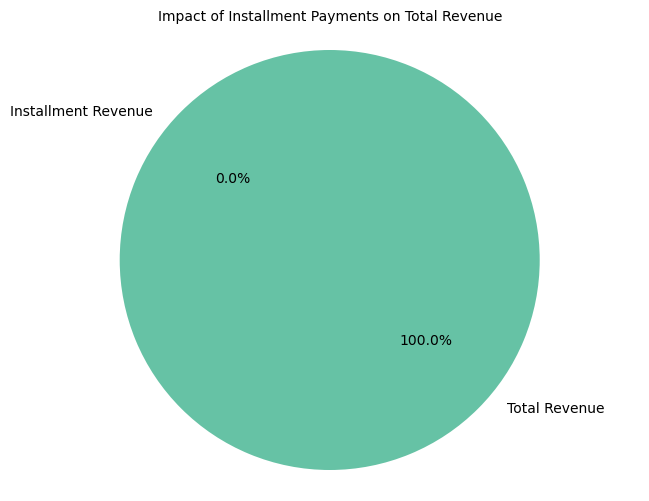

In [5]:
# Calculate total revenue
total_revenue = df['payment_value'].sum()

# Count the number of unique customers using installment payments
installment_customers = df[df['payment_type'] == 'installment']['customer_unique_id'].nunique()

# Calculate total revenue from installment payments
installment_revenue = df[df['payment_type'] == 'installment']['payment_value'].sum()

# Calculate percentage of total revenue from installment payments
installment_revenue_percentage = (installment_revenue / total_revenue) * 100

# Display the results
print(f"Total Revenue: {total_revenue:.2f}")
print(f"Number of Unique Customers Using Installment Payments: {installment_customers}")
print(f"Total Revenue from Installment Payments: {installment_revenue:.2f}")
print(f"Percentage of Total Revenue from Installment Payments: {installment_revenue_percentage:.2f}%")

# Visualizing the impact on revenue
labels = ['Total Revenue', 'Installment Revenue']
sizes = [total_revenue, installment_revenue]
colors = ['#66c2a5', '#fc8d62']

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

# Add title
ax.set_title('Impact of Installment Payments on Total Revenue', fontsize=10)

# Professional formatting
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('impact_of_installment_payments.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


# 2. Does the type of payment our customers choose impact the average order value?


Average Order Value by Payment Type:
   payment_type  payment_value
0      UNKNOWN     108.200000
1       boleto     177.402470
2  credit_card     179.809887
3   debit_card     151.011731
4  not_defined       0.000000
5      voucher      67.520242


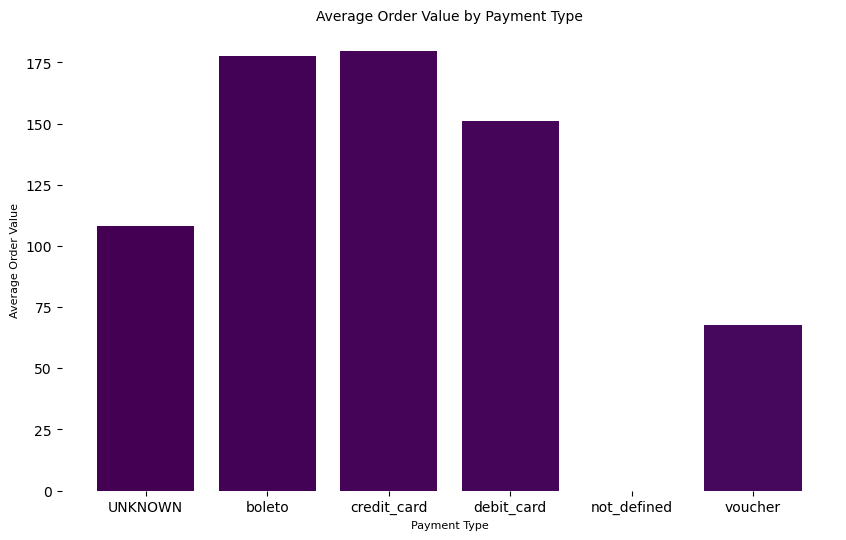

In [6]:
# Calculate average order value by payment type
average_order_value = df.groupby('payment_type')['payment_value'].mean().reset_index()

# Display the average order value for each payment type
print("Average Order Value by Payment Type:\n", average_order_value)

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(range(len(average_order_value)))

# Create a bar chart for average order values
ax.bar(average_order_value['payment_type'], average_order_value['payment_value'], color=colors)

# Add labels and title
ax.set_title('Average Order Value by Payment Type', fontsize=10)
ax.set_xlabel('Payment Type', fontsize=8)
ax.set_ylabel('Average Order Value', fontsize=8)

# Professional formatting: Remove spines and gridlines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

# Save the chart as PNG
plt.savefig('average_order_value_by_payment_type.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


# 3. Which sellers are offering the most installment options, and are they seeing more sales because of it?


In [8]:
# Ensure 'payment_type' and 'payment_value' are present
if 'payment_type' in df.columns and 'payment_value' in df.columns and 'seller_id' in df.columns:
    
    # Count the number of installment payment options per seller
    installment_sellers = df[df['payment_type'] == 'installment'].groupby('seller_id').size().reset_index(name='installment_count')
    
    # Check if there are any sellers with installment options
    if installment_sellers.empty:
        print("No sellers offering installment options found.")
    else:
        # Calculate total sales for each seller offering installment options
        total_sales_installment = df[df['payment_type'] == 'installment'].groupby('seller_id')['payment_value'].sum().reset_index(name='total_sales')

        # Merge the two dataframes on seller_id
        seller_analysis = pd.merge(installment_sellers, total_sales_installment, on='seller_id', how='outer')

        # Display the sellers offering installment options with their sales
        print("Sellers Offering Installment Options and Their Sales:\n", seller_analysis)

        # Plotting the results
        fig, ax = plt.subplots(figsize=(10, 6))

        # Create a scatter plot to visualize the relationship
        ax.scatter(seller_analysis['installment_count'], seller_analysis['total_sales'], color='dodgerblue')

        # Add labels and title
        ax.set_title('Sellers Offering Installment Options vs Total Sales', fontsize=10)
        ax.set_xlabel('Number of Installment Options', fontsize=8)
        ax.set_ylabel('Total Sales (Payment Value)', fontsize=8)

        # Professional formatting: Remove spines and gridlines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.grid(False)

        # Save the chart as PNG
        plt.savefig('installment_options_vs_total_sales.png', format='png', dpi=300, bbox_inches='tight')
        plt.show()
else:
    print("Ensure 'payment_type', 'payment_value', and 'seller_id' columns are present in the DataFrame.")


No sellers offering installment options found.
